# Homework #3 (Due 10/01/2020, 11:59pm)
## Sampling and Monte Carlo Integration

**AM 207: Advanced Scientific Computing**<br>
**Instructor: Weiwei Pan**<br>
**Fall 2020**

**Name:** Arnob Roy

### Instructions:

**Submission Format:** Use this notebook as a template to complete your homework. Please intersperse text blocks (using Markdown cells) amongst `python` code and results -- format your submission for maximum readability. Your assignments will be graded for correctness as well as clarity of exposition and presentation -- a “right” answer by itself without an explanation or is presented with a difficult to follow format will receive no credit.

**Code Check:** Before submitting, you must do a "Restart and Run All" under "Kernel" in the Jupyter or colab menu. Portions of your submission that contains syntactic or run-time errors will not be graded.

**Libraries and packages:** Unless a problems specifically asks you to implement from scratch, you are welcomed to use any `python` library package in the standard Anaconda distribution.

In [1]:
### Import basic libraries
import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

## Problem Description

Let $X$ be a random variable with distribution described by the following pdf:

$$
f_X(x) = \begin{cases}
\frac{1}{12}(x-1), &1\leq x\leq 3\\
-\frac{1}{12}(x-5), &3< x\leq 5\\
\frac{1}{6}(x-5), &5< x\leq 7\\
-\frac{1}{6}(x-9), &7< x\leq 9\\
0, &otherwise
\end{cases}
$$

Let $h$ be the following function of the random variable $X$:

$$
h(x) = 7 * \mathrm{exp}\left\{\frac{(x-4)^2}{-2}\right\} + 3 * \mathrm{exp}\left\{\frac{(x-8)^2}{-2 * 0.7^2}\right\}
$$

Our goal is to compute the expected value of $h(X)$:
$$
I = \mathbb{E}_{X\sim f_X}\left[h(X)\right] = \int_{\Omega} h(x) f_X(x)dx,
$$
where $\Omega$ is the domain of $f_X$.

## Part I. Implement Some Monte Carlo Estimates

Approximate $\mathbb{E}_{X\sim f_X}[h(X)]$ using the Monte Carlo integration methods and your choice of a reasonable fixed $S$ (for rejection sampling, this means run the algorithm $S$ times):


1. ***Inverse CDF Sampling*** and naive Monte Carlo estimation.<br><br>

2. ***Rejection Sampling*** and naive Monte Carlo estimation, using each of the following

  - a uniform proposal distribution
  - a normal proposal distribution 

  and your choice of reasonable parameters for the proposal distributions.<br><br>
  
3. ***Importance Sampling*** using each of the following

  - a uniform importance distribution 
  - a normal importance distribution

  and your choice of reasonable parameters for the importance distributions.<br><br>
  
2. ***Stratified Sampling*** using 4 strata, whose end points are given by
$$
[1, 3, 5, 6, 9].
$$
Use inverse cdf sampling on each stratum.

***My Answer Attempt.***

***Naive Monte Carolo Estimation of Integrals***

Let $I$ denote the integral 
$$\mathbb{E}_{\theta|Y}[f(\theta)] = \int_\Theta f(\theta)\, p(\theta | Y)\,d\theta$$ 

and let $\widehat{I}$ denote the approximation 

$$\frac{1}{S}\sum_{s=1}^S f(\theta_s),\, \theta_s \sim p(\theta | Y).$$ 

We call $\widehat{I}$ the ***Monte Carlo estimate*** of $I$. 

**1. Inverse CDF Sampling** and naive Monte Carlo estimation

Since our pdf: $p(\theta | Y)=f_X$, I find the CDF of this probability distribution as the integral:

$$F_X(a)=\mathbb{P}[X\le a]=\int_{-\infty}^a f_X(t)dt$$


$$
F_X(a)= \begin{cases}
\int_{1}^3 \frac{1}{12}(x-1)dx\\
\int_{3}^5 -\frac{1}{12}(x-5)dx\\
\int_{5}^7 \frac{1}{6}(x-5)dx\\
\int_{7}^9 -\frac{1}{6}(x-9)dx\\
\int 0dx, &otherwise
\end{cases}
$$

We can consider proposal distributions by evaluating the integral. Then to find the inverse CDF, solve for x.

However, since we are using Monte Carlo Integration methods, and we select $f(\theta)=h(x)$ and simulate samples from the uniform distribution to get mean and variance for Inverse CDF sampling:

$$\mathbb{E}_{X\sim f_X}\left[h(X)\right] = \int_{\Omega} 7 * \mathrm{exp}\left\{\frac{(x-4)^2}{-2}\right\} + 3 * \mathrm{exp}\left\{\frac{(x-8)^2}{-2 * 0.7^2}\right\} f_X(x)dx,$$

where we are trying to estimate,

$$\mathbb{E}_{X\sim f_X}\left[h(X)\right] =  \int_X h(x)f_X(x)\  dx \text{, where } \int_\Theta f(\theta)\ p(\theta | Y) d\theta \approx \frac{1}{S}\sum_{s=1}^S f(\theta_s)$$

and I sample from the uniform distribution $U(0,1)$ and attempt to estimate $\mathbb{E}_{X\sim f_X}\left[h(X)\right]$:

In [5]:
import math

S=300

estimates = []

for i in range(S):
    u = np.random.uniform(0, 1)
    estimates.append(np.sum(7*((math.exp(u-4)**2)/-2)+3*((math.exp(u-8)**2)/(-2-0.7**2))))
                             
print("Mean {}".format(np.mean(estimates)))
print("Variance {}".format(np.std(estimates)**2))

Mean -0.0037160788556950884
Variance 4.3910058829032504e-06


**2. Rejection Sampling** and naive Monte Carlo estimation

After Inverse CDF Sampling, I believe I can consider a uniform proposal distribution and a normal proposal distribution:

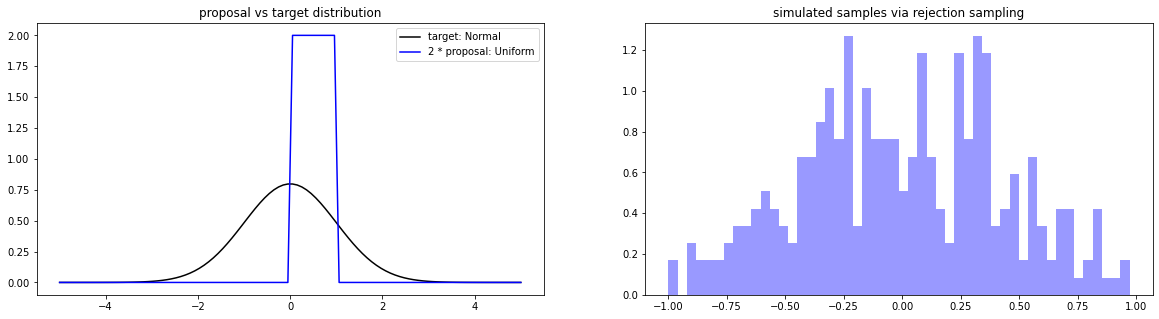

In [28]:
#PROPOSAL: UNIFORM
target_pdf = sp.stats.norm(loc=0, scale=1).pdf
proposal_pdf = sp.stats.uniform.pdf

M = 2
N = S
samples = []

while len(samples) < N:
    proposed_sample = sp.stats.uniform.rvs(size=1)
    u = np.random.uniform(0, 1)
    if u < target_pdf(2 * proposed_sample) / (M * proposal_pdf(proposed_sample)):
        samples.append(proposed_sample * np.random.choice([-1, 1], size=1))
        
samples = np.array(samples)

fig, ax = plt.subplots(1, 2, figsize=(20, 5))
x = np.linspace(-5, 5, 100)
ax[0].plot(x, 2 * target_pdf(x), color='black', label='target: Normal')
ax[0].plot(x, M * proposal_pdf(x), color='blue', label='{} * proposal: Uniform'.format(M))
ax[0].set_title('proposal vs target distribution')
ax[0].legend(loc='best')
ax[1].hist(samples, bins=50, density=True, color='blue', alpha=0.4)
ax[1].set_title('simulated samples via rejection sampling')
plt.show()

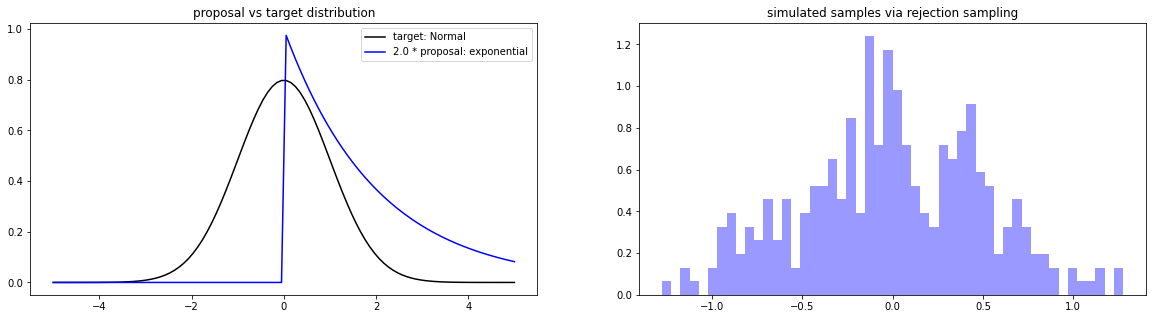

In [29]:
#PROPOSAL: NORMAL
target_pdf = sp.stats.norm(loc=0, scale=1).pdf
proposal_pdf = sp.stats.expon(scale=1 / 0.5).pdf
M = 2.
N = S
samples = []

while len(samples) < N:
    proposed_sample = sp.stats.expon.rvs(scale=1 / 0.5, size=1)
    u = np.random.uniform(0, 1)
    if u < target_pdf(2 * proposed_sample) / (M * proposal_pdf(proposed_sample)):
        samples.append(proposed_sample * np.random.choice([-1, 1], size=1))
        
samples = np.array(samples)

fig, ax = plt.subplots(1, 2, figsize=(20, 5))
x = np.linspace(-5, 5, 100)

ax[0].plot(x, 2 * target_pdf(x), color='black', label='target: Normal')
ax[0].plot(x, M * proposal_pdf(x), color='blue', label='{} * proposal: exponential'.format(M))
ax[0].set_title('proposal vs target distribution')
ax[0].legend(loc='best')
ax[1].hist(samples, bins=50, density=True, color='blue', alpha=0.4)
ax[1].set_title('simulated samples via rejection sampling')
plt.show()

**3. Importance Sampling** and naive Monte Carlo estimation

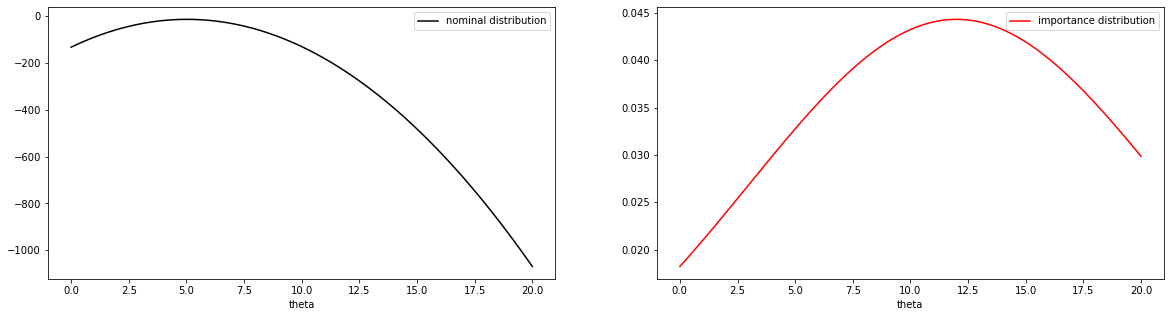

In [12]:
h = lambda x: 7*(((x-4)**2)/-2)+3*(((x-8)**2)/(-2-0.7**2))

#normal pdf
normal = sp.stats.norm(loc=12, scale=3**2).pdf
#visualize nominal and importance distributions
x = np.linspace(0, 20, 100)
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].plot(x, h(x), color='black', label='nominal distribution')
ax[0].set_xlabel('theta')
ax[0].legend(loc='best')
ax[1].plot(x, normal(x), color='red', label='importance distribution')
ax[1].set_xlabel('theta')
ax[1].legend(loc='best')
plt.show()

In [23]:
total_trials = 500

S = 100

is_estimates = []
monte_carlo = []
importance_weights = []

for i in range(total_trials):

    theta = np.random.uniform(0, 20, size=S)
    monte_carlo.append(h(theta).mean())
    
    theta = np.random.uniform(0, 1, size=S)
    weights = np.array([0 if (t < 0 or t > 20) else 1. / (20 * normal(t)) for t in theta])
    importance_weights.append(len(weights[weights==0]))
    is_estimates.append((weights * h(theta)).mean())

mc_variance = np.std(monte_carlo)**2
is_mc_variance = np.std(is_estimates)**2

print(mc_variance)
print(is_mc_variance)

1097.8583304422043
21.15848617754763


In [17]:
total_trials = 500

S = 100

is_estimates = []
monte_carlo = []
importance_weights = []

for i in range(total_trials):

    theta = np.random.uniform(0, 20, size=S)
    monte_carlo.append(h(theta).mean())
    
    theta = np.random.normal(12, 3, size=S)
    weights = np.array([0 if (t < 0 or t > 20) else 1. / (20 * normal(t)) for t in theta])
    importance_weights.append(len(weights[weights==0]))
    is_estimates.append((weights * h(theta)).mean())

mc_variance = np.std(monte_carlo)**2
is_mc_variance = np.std(is_estimates)**2

print(mc_variance)
print(is_mc_variance)

895.3904982049187
715.9409415407664


**4. Stratified Sampling**  using 4 strata, whose end points are given by $[1, 3, 5, 6, 9]$

I could not get the exponential function to work in Python.

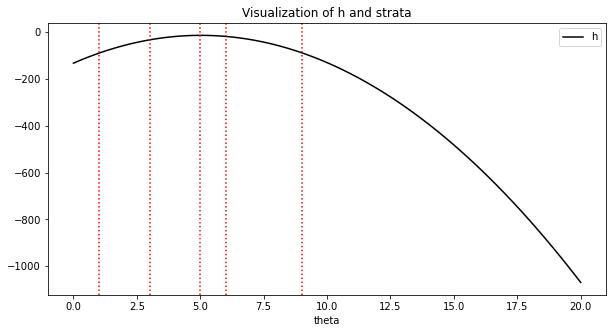

In [16]:
#define the end points of the strata
import math
h = lambda x: 7*(((x-4)**2)/-2)+3*(((x-8)**2)/(-2-0.7**2))

#h = lambda x: 7*((math.exp(x-4)**2)/-2)+3*((math.exp(x-8)**2)/(-2-0.7**2))

strata = [1,3,5,6,9]
x = np.linspace(0,20,100)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(x, h(x), color='black', label='h')

for stratus in strata:
    ax.axvline(x=stratus, linestyle=':', color='red')
    
ax.set_title('Visualization of h and strata')
ax.set_xlabel('theta')
ax.legend(loc='best')
plt.show()

In [23]:
total_trials = 500

w = [(strata[m + 1] - strata[m]) / 20. for m in range(len(strata) - 1)]

S = [int(weight * 100) for weight in w]

stratified_estimates = []
monte_carlo = []

for i in range(total_trials):

    theta = np.random.uniform(0, 20, size=np.sum(S))
    monte_carlo.append(h(theta).mean())
    
    sum_over_strata = 0
    for m in range(len(strata) - 1):
        theta = np.random.uniform(strata[m], strata[m + 1], size=S[m])
        stratus_estimate = (w[m] * h(theta)).mean()
        sum_over_strata += stratus_estimate
        
    stratified_estimates.append(np.sum(sum_over_strata))

mc_variance = np.std(monte_carlo)**2
stratified_mc_variance = np.std(stratified_estimates)**2

In [28]:
print('variance of monte carlo estimate:', mc_variance)
print('variance of stratified monte carlo estimate:', stratified_mc_variance)

variance of monte carlo estimate: 2377.2659296271054
variance of stratified monte carlo estimate: 0.9720413343365345


[-296.31954899419486,
 -210.20266763952978,
 -329.5728870103438,
 -312.85721941123956,
 -322.2230432720095,
 -377.02620393798975,
 -256.9293496160165,
 -346.1317590234542,
 -240.98586791316453,
 -299.26858406045994,
 -246.09764356147008,
 -334.5054047730312,
 -327.5153982261423,
 -267.42443153218227,
 -369.41827589858474,
 -191.81902010098534,
 -226.02557258656753,
 -224.4593437231991,
 -265.91014439685796,
 -220.0969498510106,
 -270.34960934083995,
 -312.81296546580734,
 -285.2702774394438,
 -303.1920067918225,
 -230.06480086986193,
 -402.0483516541402,
 -331.26124743906234,
 -312.6462826329454,
 -207.50120954770932,
 -279.5110633139324,
 -302.4825492324618,
 -195.0743032795422,
 -211.52073310483584,
 -349.51101467588296,
 -208.96269488974434,
 -366.69281943680534,
 -300.79984053537873,
 -349.3454351229435,
 -250.9095106611202,
 -309.9902595517121,
 -230.33337236897228,
 -314.0179166811598,
 -207.0996968717061,
 -285.22747829656976,
 -374.7821521982265,
 -338.00178250404804,
 -338.496

## Part II. Debug Your Samplers

1. Visualize the pdf $f_X$ as well as samples obtained from Inverse CDF Sampling and Rejection Sampling (for both proposal distributions). It's probably better to make separate plots for each set of samples.

  What does the comparison say about the quality of your samples? In particular, which sampler (and which proposal distribution) produces "better" samples? Is this surprising -- i.e. use some properties of these samplers discussed in class to explain the patterns you're observing?
  
  **Hint:** you might find it helpful to visualize the proposal distributions along with $f_X$ in your analysis of rejection sampling.<br><br>


Mean -0.0037538940269410165
Variance 4.549638362277024e-06


Text(0.5, 1.0, 'Estimates from 0 to 1')

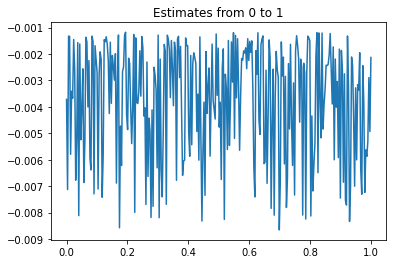

In [37]:
import math

S=300

estimates = []

for i in range(S):
    u = np.random.uniform(0, 1)
    estimates.append(np.sum(7*((math.exp(u-4)**2)/-2)+3*((math.exp(u-8)**2)/(-2-0.7**2))))
                             
print("Mean {}".format(np.mean(estimates)))
print("Variance {}".format(np.std(estimates)**2))

x = np.linspace(0, 1, 300)
fig, ax = plt.subplots()
ax.plot(x, estimates)
ax.set_title('Estimates from 0 to 1')

Mean -0.012456054853642111
Variance 0.20381488485239843


Text(0.5, 1.0, 'Samples from 0 to 1')

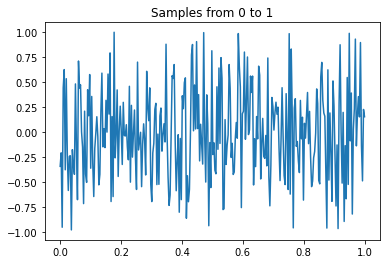

In [34]:
#PROPOSAL: UNIFORM
target_pdf = sp.stats.norm(loc=0, scale=1).pdf
proposal_pdf = sp.stats.uniform.pdf

M = 2
N = S
samples = []

while len(samples) < N:
    proposed_sample = sp.stats.uniform.rvs(size=1)
    u = np.random.uniform(0, 1)
    if u < target_pdf(2 * proposed_sample) / (M * proposal_pdf(proposed_sample)):
        samples.append(proposed_sample * np.random.choice([-1, 1], size=1))
        
samples = np.array(samples)

print("Mean {}".format(np.mean(samples)))
print("Variance {}".format(np.std(samples)**2))

x = np.linspace(0, 1, 300)
fig, ax = plt.subplots()
ax.plot(x, samples)
ax.set_title('Samples from 0 to 1')

Mean -0.006024716557007631
Variance 0.2244104966320639


Text(0.5, 1.0, 'Samples from 0 to 1')

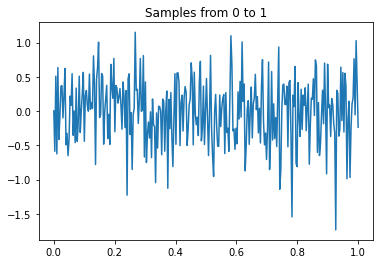

In [35]:
#PROPOSAL: NORMAL
target_pdf = sp.stats.norm(loc=0, scale=1).pdf
proposal_pdf = sp.stats.expon(scale=1 / 0.5).pdf
M = 2.
N = S
samples = []

while len(samples) < N:
    proposed_sample = sp.stats.expon.rvs(scale=1 / 0.5, size=1)
    u = np.random.uniform(0, 1)
    if u < target_pdf(2 * proposed_sample) / (M * proposal_pdf(proposed_sample)):
        samples.append(proposed_sample * np.random.choice([-1, 1], size=1))
        
samples = np.array(samples)

print("Mean {}".format(np.mean(samples)))
print("Variance {}".format(np.std(samples)**2))

x = np.linspace(0, 1, 300)
fig, ax = plt.subplots()
ax.plot(x, samples)
ax.set_title('Samples from 0 to 1')

2. Visualize the distribution of the importance weights (one for each importance distribution). 
  
   Is the weight distribution surprising -- i.e. use some properties of these samplers discussed in class to explain the patterns you're observing?

   What do these importance weights tell you about the quality of your importance sampling estimate? 
   
     **Hint:** you might find it helpful to visualize the importance distributions along with $f_X$ and $h$ in your analysis of importance sampling.<br><br>


974.7506905823418
17.39616262882867


Text(0.5, 1.0, 'Importance Weights')

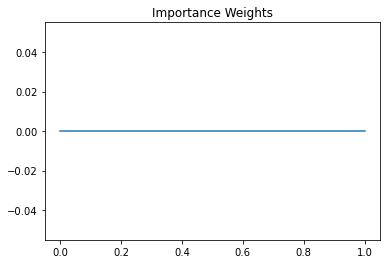

In [8]:
h = lambda x: 7*(((x-4)**2)/-2)+3*(((x-8)**2)/(-2-0.7**2))
normal = sp.stats.norm(loc=12, scale=3**2).pdf
total_trials = 500

S = 100

is_estimates = []
monte_carlo = []
importance_weights = []

for i in range(total_trials):

    theta = np.random.uniform(0, 20, size=S)
    monte_carlo.append(h(theta).mean())
    
    theta = np.random.uniform(0, 1, size=S)
    weights = np.array([0 if (t < 0 or t > 20) else 1. / (20 * normal(t)) for t in theta])
    importance_weights.append(len(weights[weights==0]))
    is_estimates.append((weights * h(theta)).mean())

mc_variance = np.std(monte_carlo)**2
is_mc_variance = np.std(is_estimates)**2

print(mc_variance)
print(is_mc_variance)

x = np.linspace(0, 1, 500)
fig, ax = plt.subplots()
ax.plot(x, importance_weights)
ax.set_title('Importance Weights')

3. Visualize the distribution of all the samples across strata. Is the distribution what you expect -- i.e. use some properties of these samplers discussed in class to explain the patterns you're observing?<br><br>


variance of monte carlo estimate: 2448.881831066827
variance of stratified monte carlo estimate: 0.9199293604638777


Text(0.5, 1.0, 'Stratified Estimates')

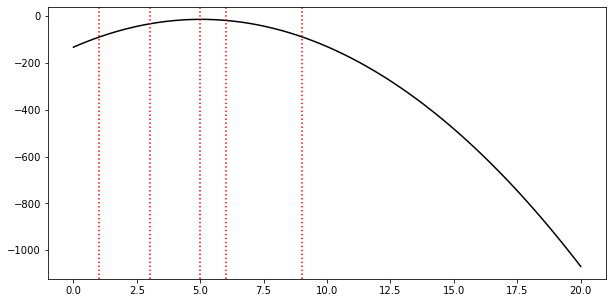

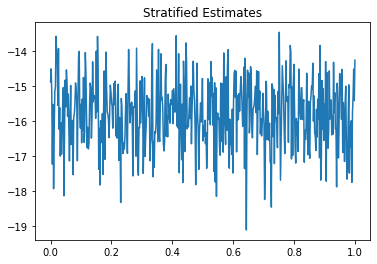

In [15]:
#define the end points of the strata
import math
h = lambda x: 7*(((x-4)**2)/-2)+3*(((x-8)**2)/(-2-0.7**2))

#h = lambda x: 7*((math.exp(x-4)**2)/-2)+3*((math.exp(x-8)**2)/(-2-0.7**2))

strata = [1,3,5,6,9]
x = np.linspace(0,20,100)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(x, h(x), color='black', label='h')

for stratus in strata:
    ax.axvline(x=stratus, linestyle=':', color='red')

total_trials = 500

w = [(strata[m + 1] - strata[m]) / 20. for m in range(len(strata) - 1)]

S = [int(weight * 100) for weight in w]

stratified_estimates = []
monte_carlo = []

for i in range(total_trials):

    theta = np.random.uniform(0, 20, size=np.sum(S))
    monte_carlo.append(h(theta).mean())
    
    sum_over_strata = 0
    for m in range(len(strata) - 1):
        theta = np.random.uniform(strata[m], strata[m + 1], size=S[m])
        stratus_estimate = (w[m] * h(theta)).mean()
        sum_over_strata += stratus_estimate
        
    stratified_estimates.append(np.sum(sum_over_strata))

mc_variance = np.std(monte_carlo)**2
stratified_mc_variance = np.std(stratified_estimates)**2

print('variance of monte carlo estimate:', mc_variance)
print('variance of stratified monte carlo estimate:', stratified_mc_variance)

x = np.linspace(0, 1, 500)
fig, ax = plt.subplots()
ax.plot(x, stratified_estimates)
ax.set_title('Stratified Estimates')

4. (**Extra Credit**) Compute the ***effective sample size (ESS)*** of the importance sampling estimates (for both distributions). You'll need to look up the definition of ESS (there are three commonly used definitions, pick any one). How does the effective sample size relate to the trends in the importance weight distributions?

I read this post: https://jwalton.info/Efficient-effective-sample-size-python/#:~:text=The%20effective%20sample%20size%20%28ESS%29%20is%20introduced%20as,the%20output%20and%20efficiency%20of%20their%20MCMC%20scheme.

Apparently MCMC is a way of sampling where ESS measures the 'size' of a sample when samples are correlated.

I also considered the docs for TensorFlow to get an idea of how ESS looks like.

## Part III: Variance Reduction

1. Compute the sample variance of the four Monte Carlo estimates in Part I. Based on the discussions in lecture, which sampling methods (and proposal/importance distributions) is expected, in principle, to resulted in lower variances? How well do your results align with these expectations?<br><br>

Sample Variances from the Part I code last run here in Part 2:

**Inverse CDF:** Variance 4.549638362277024e-06

**Rejection (Uniform Proposal):** Variance 0.20381488485239843

**Rejection (Normal Proposal):** Variance 0.2244104966320639

**Importance Sampling (Uniform):** Variance 17.39616262882867

**Stratified (Uniform):** Variance of stratified monte carlo estimate: 0.9199293604638777

2. Based on your experiments, would you feel comfortable concluding which type of Monte Carlo estimate will **generally** have the lowest variance? Why or why not?<br><br>

I understand that stratified sampling, where we cut the domain into strata pieces, and importance sampling, where we choose $q$ that places more weight where $f(\theta)$ has high variance. Both of these methods have tools to reduce variance. However, after working with the given $f_X$, I'm not sure which is the best way to sample. I was not successful in using all of the sampling methods, but I could guess stratified sampling since it was a piecewise function and we can cut the domain.

3. (**Extra Credit**) Implement the control variate Monte Carlo estimate for $I$ for your choice of a control variate $g$ and sample using the inverse CDF sampler. Argue for why your choice of $g$ is appropriate and demonstrate that your control variate estimate has lower variance than the naive Monte Carlo using inverse CDF sampling.

variance of monte carlo estimate: 0.008555691008204547
variance of control variate monte carlo estimate: 859.2734629341805


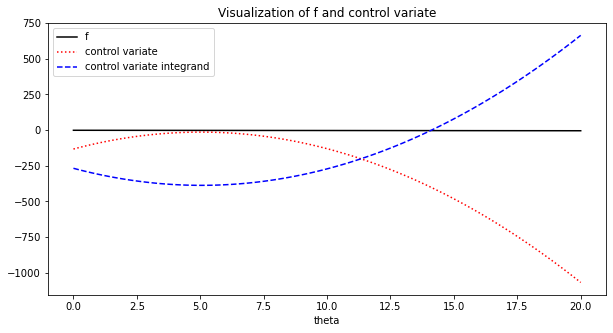

In [31]:
#total number of trials to run (for computing variance of estimators)
total_trials = 500
#total number of samples
S = 100
#list of monte carlo estimates
monte_carlo = []
#list of control variate estimates
control_variate = []

#definition of the monte carlo integrand
f = lambda x: x/12 - 1/12
f = lambda x: -x/12 - 5/12
f = lambda x: x/6 - 5/6
f = lambda x: -x/6 - 9/6


#definition of the control variate
h = lambda x: 7*(((x-4)**2)/-2)+3*(((x-8)**2)/(-2-0.7**2))
#definition of the control variate mc integrand
control_mc = lambda x: f(x) - 1.0 * (h(x) + 400)

#estimate the integral 
for i in range(total_trials):
    #sample theta's
    theta = np.random.uniform(0, 20, 100)
    #compute the MC estimate
    monte_carlo.append(f(theta).mean())
    #compute the control variate MC estimate
    control_variate.append(control_mc(theta).mean())
    
mc_variance = np.std(monte_carlo)**2
control_mc_variance = np.std(control_variate)**2

print('variance of monte carlo estimate:', mc_variance)
print('variance of control variate monte carlo estimate:', control_mc_variance)

x = np.linspace(0, 20, 100)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(x, f(x), color='black', label='f')
ax.plot(x, h(x),linestyle=':', color='red', label='control variate')
ax.plot(x, control_mc(x), linestyle='--', color='blue', label='control variate integrand')
ax.set_title('Visualization of f and control variate')
ax.set_xlabel('theta')
ax.legend(loc='best')
plt.show()